In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
from __future__ import division
import seaborn as sns
from sklearn.cross_validation import train_test_split
sns.set(style='ticks', palette='Set2')
%matplotlib inline

Recall that the Ordinary Least Squares (OLS) regression solution for the linear model $y = X\beta + e$, is given by

$$
\arg\min_{\beta}: \,\, \|X \beta - y\|_2^2 = \arg\min_{\beta}{\rm SSE}(\beta)
$$

Regularization adds a penalty. Ridge regression adds a squared penalty which serves to regularize and shrink the coefficients:

$$
\arg\min_{\beta}{\rm SSE}(\beta) + \lambda \sum \beta_i^2 = \arg\min_{\beta}{\rm SSE}(\beta) + \lambda \|\beta\|_2^2
$$

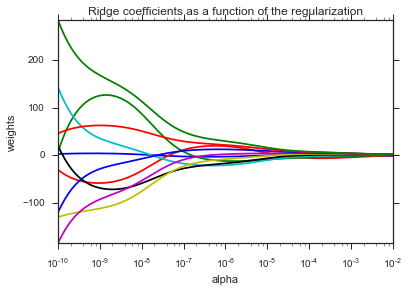

In [82]:
# A first (stylized) example of what Ridge Regression does

# We generate the data
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10) + np.random.rand(10)/100


# then we plot the results
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Why is this what we want? Let's look at the pairwise correlations.

In [13]:
# We convert to a dataframe
data = DataFrame(np.column_stack((y,X)))

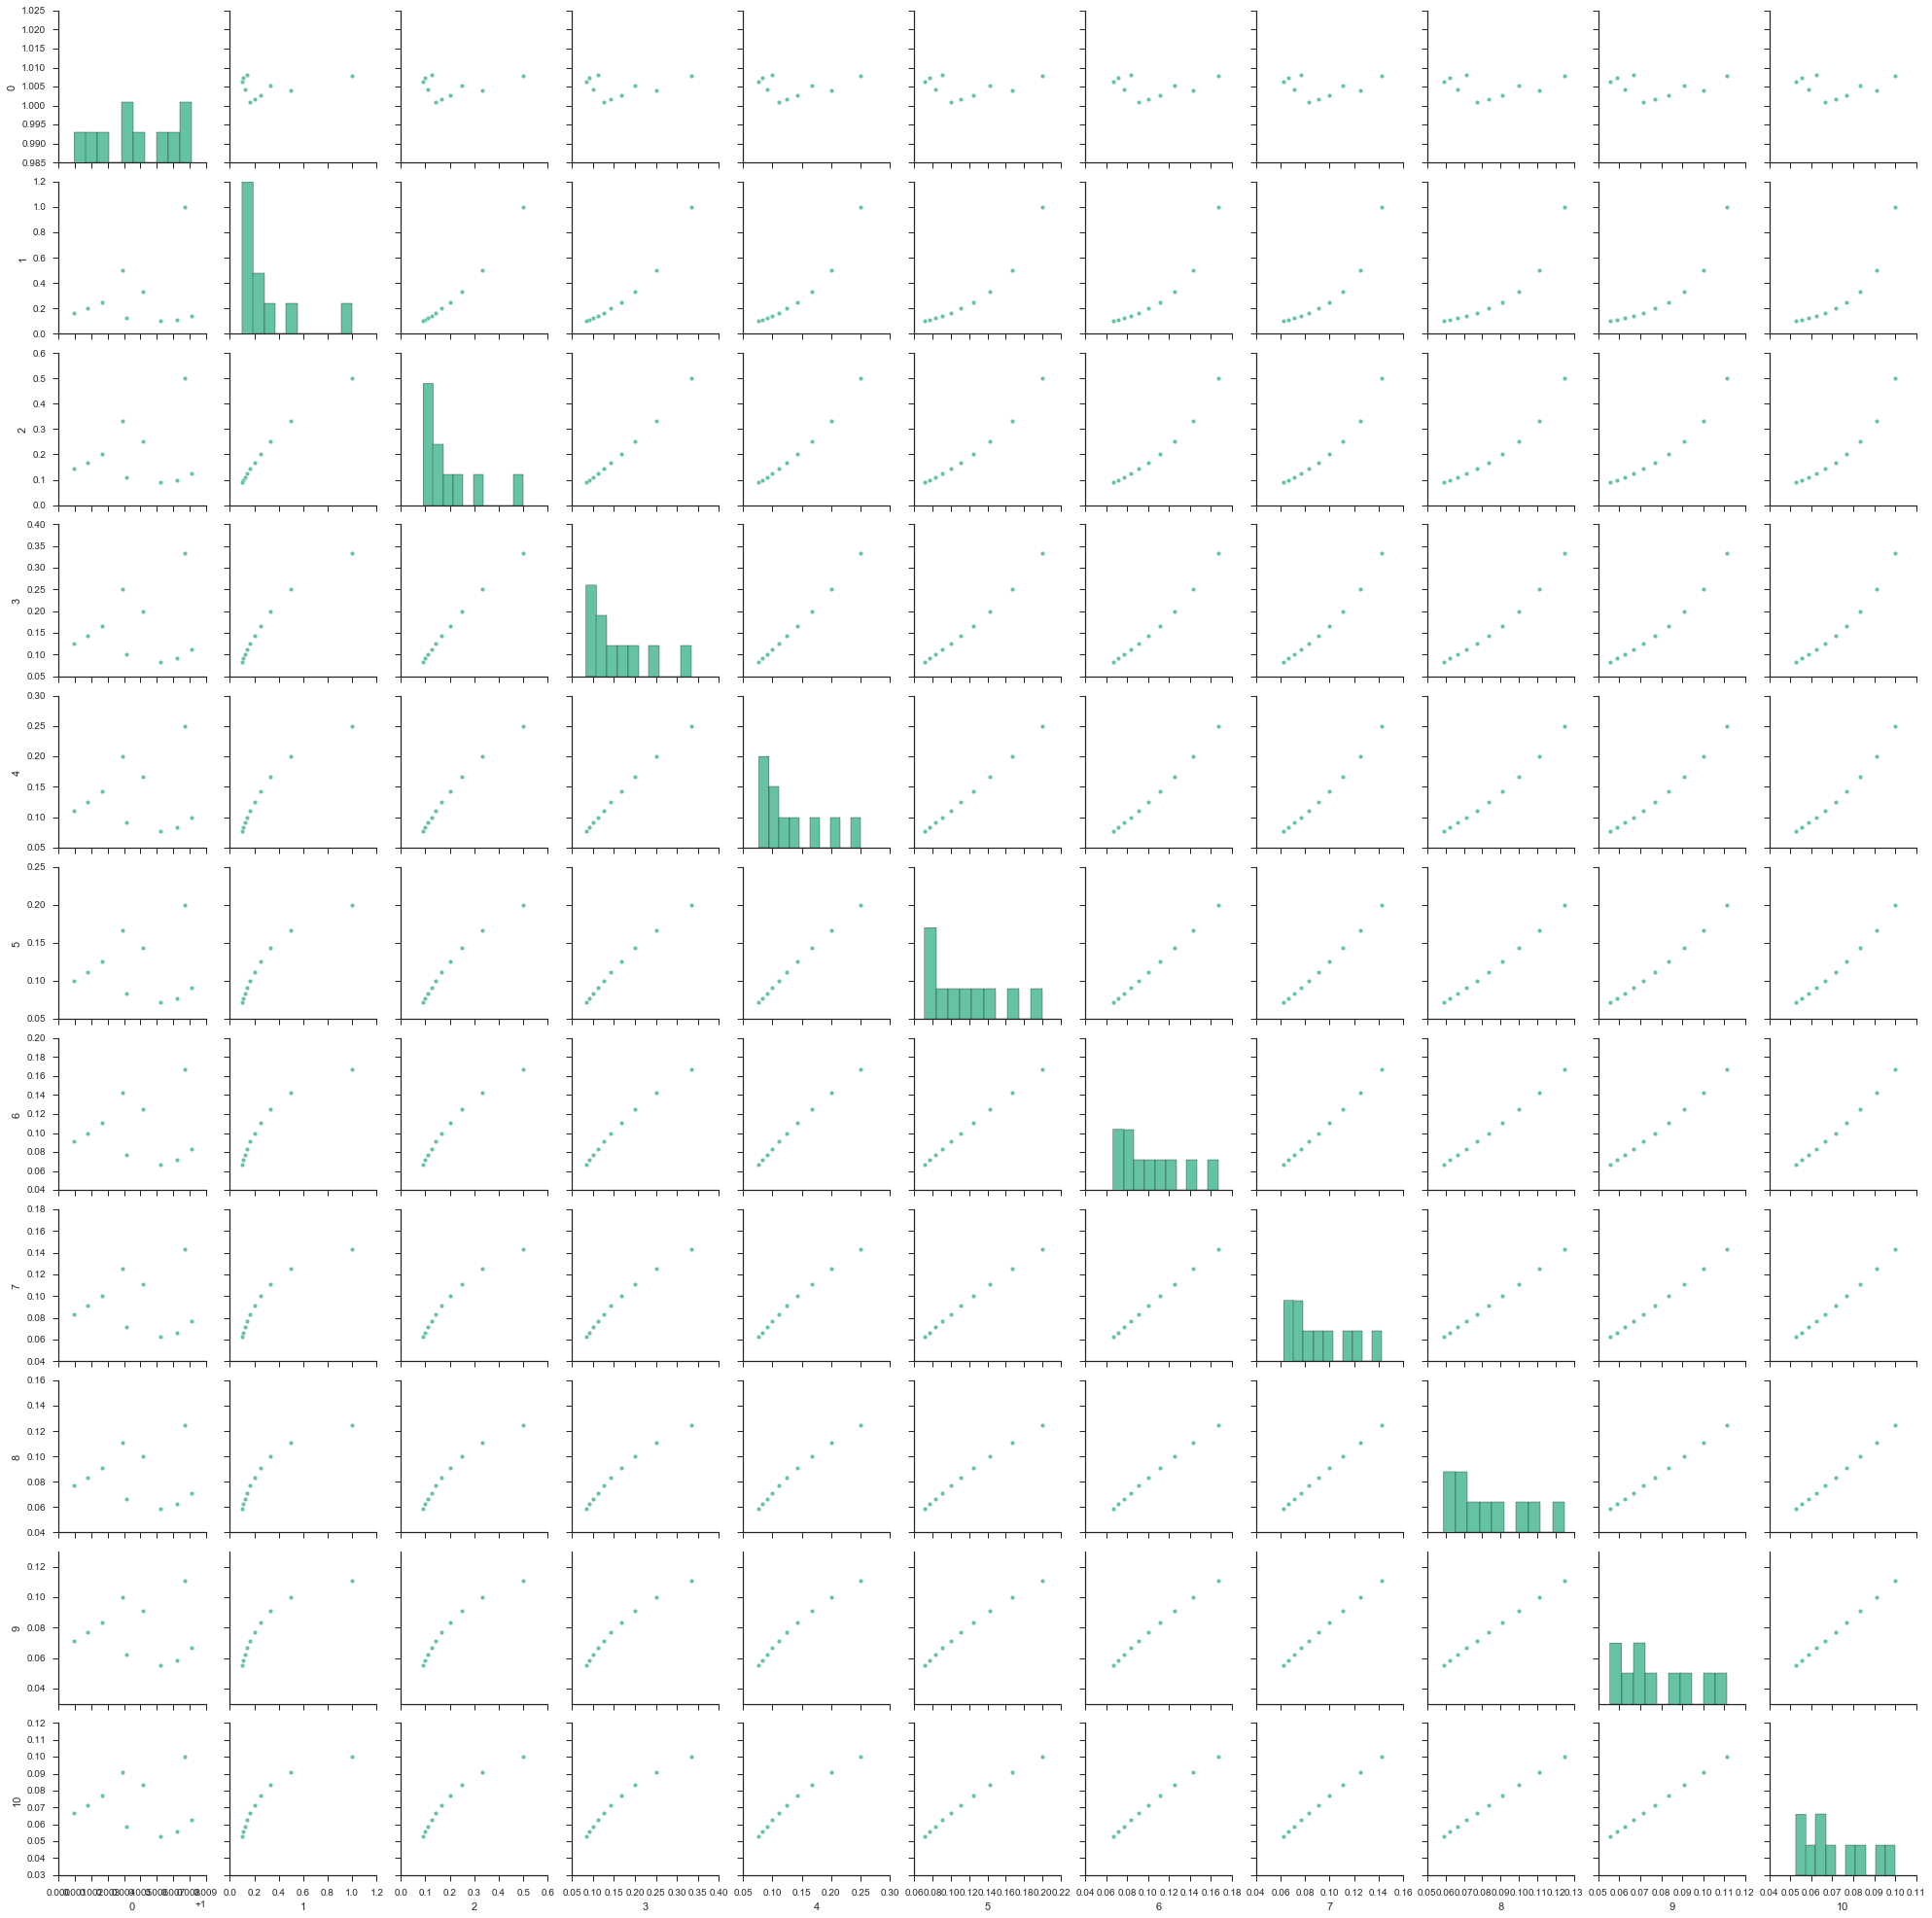

In [14]:
sns.pairplot(data)

Let's try some synthetic, but still meaningful, examples.

In [65]:
p = 20
n = 25
X = np.random.randn(n,p)
beta = np.ones(p)
y = np.dot(X,beta) + np.random.randn(n)/5

In [66]:
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),X.transpose()),y)

In [67]:
print beta_hat

[ 1.02973329  0.92101756  0.9864937   1.00004006  0.9947159   0.87839482
  1.11809202  1.01719143  0.97953024  1.06112692  1.00047924  1.03501082
  0.94149285  1.03116036  1.04173685  1.00472148  0.93845387  1.0455106
  1.05617658  1.02176946]


In [68]:
reg = 0.5
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + reg*np.eye(p)),X.transpose()),y)
print beta_hat

[ 1.05161375  0.9192336   0.99244983  1.00462427  0.96676065  0.86935928
  1.12036094  0.98368021  0.95730746  1.05238814  0.94096002  0.87874404
  0.93727537  0.99766675  0.95838898  1.02313644  0.84921869  1.00408252
  1.02637427  0.86635511]


# Exercise: estimate the variance of the estimates computed with OLS regression, and Ridge regresion. 

In [78]:
X = np.random.rand(100,10)
XXt = np.dot(X.transpose(),X)

In [79]:
np.linalg.norm(XXt)

272.44874657139877

In [80]:
XXtinv = np.linalg.inv(XXt)

In [81]:
np.linalg.norm(XXtinv)

0.45269075277178161